# Lab3 Image Processing

In [3]:
# import tools
import numpy as np
import cv2
from matplotlib import pyplot as plt

## 1 Point Operators
There are general image processing operator
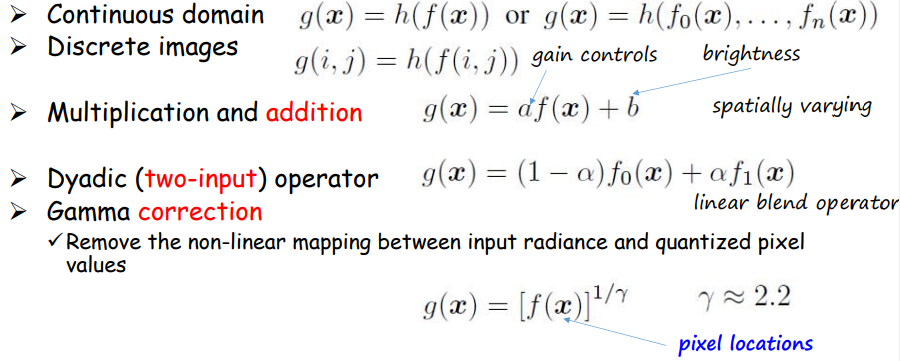
### 1.1 Compositing
inserting one image into another image
$$
C=(1-\alpha)B+\alpha F
$$
$$
B-Backgroud;F-foreground;C-new composite
$$


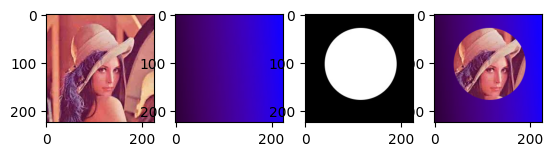

In [4]:
img =cv2.imread('lenna.jpg')   # Read image in BGR mode
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = img/255.0
back = cv2.imread('back.jpg')
back = cv2.cvtColor(back, cv2.COLOR_BGR2RGB)
back = back/255.0
alpha= cv2.imread('mat.jpg')
alpha = alpha/255.0

composite = cv2.multiply(back,(1-alpha)) + cv2.multiply(img,alpha)

ax1 = plt.subplot(1,4,1)  # Create subplot 1
plt.sca(ax1)              # Choose subplot 1
plt.imshow(img)           # show image on subplot1

ax2 = plt.subplot(1,4,2)  # Create subgplot 2
plt.sca(ax2)              # Choose subplot 2
plt.imshow(back)       # show image on subplot2

ax3 = plt.subplot(1,4,3)  # Create subgplot 3
plt.sca(ax3)              # Choose subplot 3
plt.imshow(alpha)       # show image on subplot3

ax4 = plt.subplot(1,4,4)  # Create subgplot 4
plt.sca(ax4)              # Choose subplot 4
plt.imshow(composite)       # show image on subplot4

plt.show() 

### 1.2 Histogram
You can consider histogram as a graph or plot, which gives you an overall idea about the intensity distribution of an image. It is a plot with pixel values (ranging from 0 to 255, not always) in X-axis and corresponding number of pixels in the image on Y-axis.
#### Draw histogram
Both OpenCV and Numpy come with in-built function for this. Before using those functions, we need to understand some terminologies related with histograms.

**BINS** :The above histogram shows the number of pixels for every pixel value, ie from 0 to 255. ie you need 256 values to show the above histogram.

**DIMS** : It is the number of parameters for which we collect the data. In this case, we collect data regarding only one thing, intensity value. So here it is 1.

**RANGE** : It is the range of intensity values you want to measure. Normally, it is [0,256], ie all intensity values.

- Histogram Calculation in OpenCV

So now we use cv.calcHist() function to find the histogram. Let's familiarize with the function and its parameters :

`cv.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])`
- Histogram Calculation in Numpy

Numpy also provides you a function, np.histogram(). So instead of calcHist() function, you can try below line :

`hist,bins = np.histogram(img.ravel(),256,[0,256])`

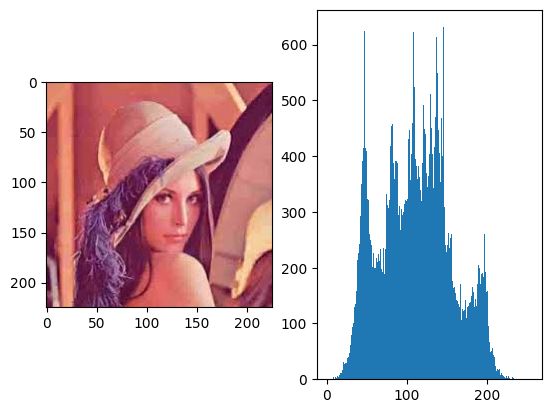

In [5]:
img =cv2.imread('lenna.jpg')   # Read image in BGR mode
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# hist = cv.calcHist([img],[0],None,[256],[0,256])
# hist,bins = np.histogram(img.ravel(),256,[0,256])

ax1 = plt.subplot(1,2,1)
ax1.imshow(img); 

ax2 = plt.subplot(1,2,2)
ax2.hist(img2.ravel(),256,[0,256]); 

plt.show()


Or you can use normal plot of matplotlib, which would be good for BGR plot. For that, you need to find the histogram data first. Try below code:

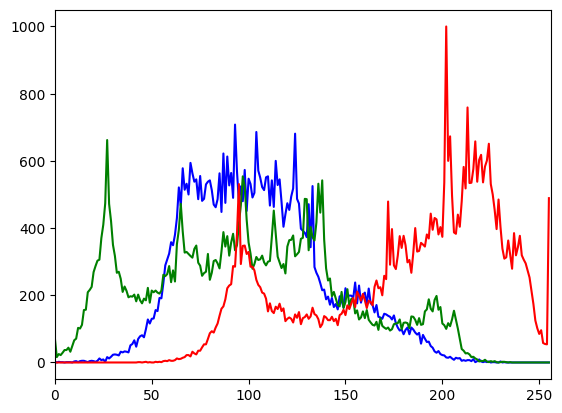

In [6]:
img =cv2.imread('lenna.jpg')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

#### Histogram Equalization
Consider an image whose pixel values are confined to some specific range of values only. For eg, brighter image will have all pixels confined to high values. But a good image will have pixels from all regions of the image. So you need to stretch this histogram to either ends (as given in below image, from wikipedia) and that is what Histogram Equalization does (in simple words). This normally improves the contrast of the image.
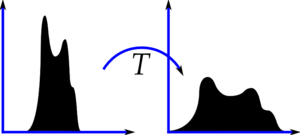

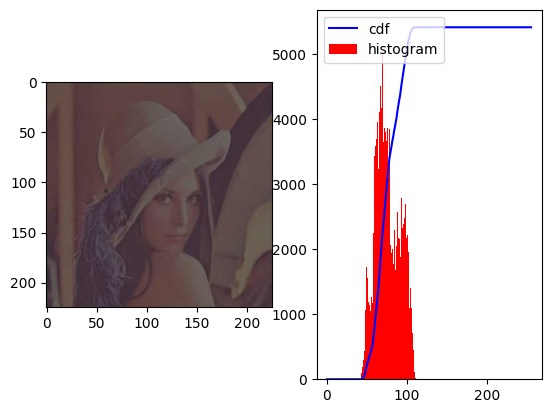

In [7]:
img =cv2.imread('lenna_hist.jpg')   # Read image in BGR mode
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

hist,bins = np.histogram(img.flatten(),256,[0,256])
 
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()

ax1 = plt.subplot(1,2,1)
ax1.imshow(img); 

ax2 = plt.subplot(1,2,2)
ax2.plot(cdf_normalized, color = 'b')
ax2.hist(img.flatten(),256,[0,256], color = 'r')
ax2.legend(('cdf','histogram'), loc = 'upper left')

plt.show()

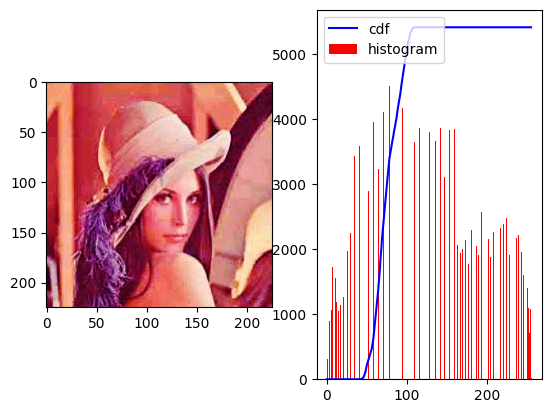

In [8]:
#Histograms Equalization using numpy
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

img2 = cdf[img]

ax1 = plt.subplot(1,2,1)
ax1.imshow(img2); 

ax2 = plt.subplot(1,2,2)
ax2.plot(cdf_normalized, color = 'b')
ax2.hist(img2.flatten(),256,[0,256], color = 'r')
ax2.legend(('cdf','histogram'), loc = 'upper left')

plt.show()

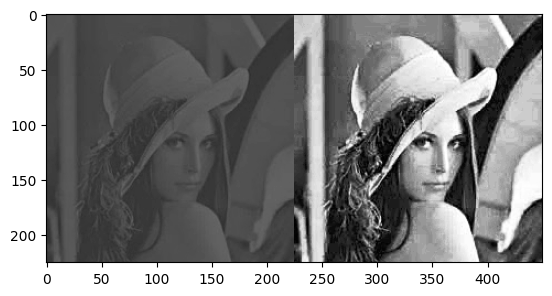

In [9]:
img =cv2.imread('lenna_hist.jpg')   # Read image in BGR mode
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
equ = cv2.equalizeHist(img_gray) # Source 8-bit single channel image.
res = np.hstack((img_gray,equ)) #stacking images side-by-side
plt.imshow(res,cmap='gray');

## 2 Neighborhood Operators（linear）
We use 2D convolution to change some features of image.These changes as follow:
- Blurred
- Sharpened
- Smoothed with edge-preserving filter
- Binary Image

### 2.1 Blurred
Image blurring is achieved by convolving the image with a low-pass filter kernel. It is useful for removing noises. It actually removes high frequency content (eg: noise, edges) from the image. The size of the kernel is ($3,3$),the kernel will be
$$
k=\frac{1}{9}
\begin{pmatrix}
1 & 1 & 1\\
1& 1& 1\\
1& 1& 1\\
\end{pmatrix}
$$


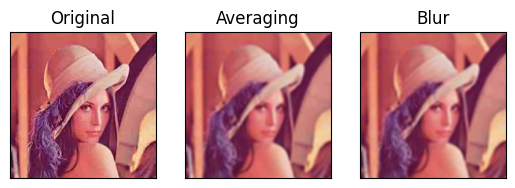

In [10]:
img = cv2.imread('lenna.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img,-1,kernel)

blur = cv2.blur(img,(5,5))

plt.subplot(131),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(blur),plt.title('Blur')
plt.xticks([]), plt.yticks([])
plt.show()

### 2.2 Gaussian Blurred
instead of box filter, gaussian kernel is used. It is done with the function, cv2.GaussianBlur().Gaussian blurring is highly effective in removing gaussian noise from the image.
The kernel will follow the Gaussian function form
$$
G(x,y)=\frac{1}{2\pi\sigma^2}e^{-\frac{x^2+y^2}{2\sigma^2}}
$$
Here a Gaussian kernel with size ($3,3$),for example, will be
$$
k=\frac{1}{16}
\begin{pmatrix}
1&2&1\\
2&4&2\\
1&2&1\\
\end{pmatrix}
$$


uint8


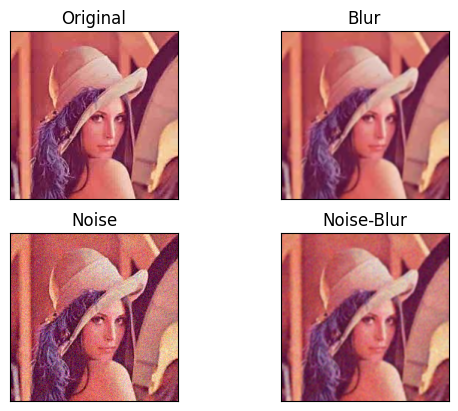

In [11]:
img = cv2.imread('lenna.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img.dtype) # show the type of img

# create gaussian-nosie
row, col, ch = img.shape #get height,width,channal
mean=0
sigma=20
gauss = np.random.normal(mean, sigma, (row, col, ch))
img_noise = img + gauss 
img_noise = np.clip(img_noise, 0, 255).astype(np.uint8)#boundary the data of img

blur = cv2.GaussianBlur(img,(5,5),0)
blur_noise = cv2.GaussianBlur(img_noise,(5,5),0)

plt.subplot(221),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(blur),plt.title('Blur')
plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(img_noise),plt.title('Noise')
plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(blur_noise),plt.title('Noise-Blur')
plt.xticks([]), plt.yticks([])
plt.show()

## 3 Neighborhood Operators（non-linear）
- Median Filtering
- Bilateral Filtering

### 3.1 Median Filtering
Here, the function `cv2.medianBlur()` takes median of all the pixels under kernel area and central element is replaced with this median value. This is highly effective against salt-and-pepper noise in the images.For example, a domain in image with size $(3,3)$:
$$
\begin{pmatrix}
20&10&25\\
15&30&5\\
50&35&40\\
\end{pmatrix}
$$
the median value is 25,so we change the center value 30->25

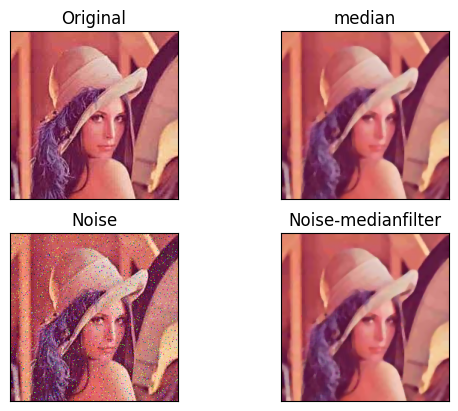

In [12]:
img = cv2.imread('lenna.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# create salt-pepper noise img
prob = 0.02 #the ratio of noise and pixels will be 2%
img_noise = np.copy(img)

salt = np.random.rand(*img.shape)<prob
img_noise[salt]= 255
pepper = np.random.rand(*img.shape)<prob
img_noise[pepper] = 0

median = cv2.medianBlur(img,5)
median_noise = cv2.medianBlur(img_noise,5)

#
plt.subplot(221),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(median),plt.title('median')
plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(img_noise),plt.title('Noise')
plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(median_noise),plt.title('Noise-medianfilter')
plt.xticks([]), plt.yticks([])
plt.show()

### 3.2 Bilateral Filtering
`cv2.bilateralFilter()` is highly effective in noise removal while keeping edges sharp. But the operation is slower compared to other filters.
In this filter the output pixel will be
$$
I_{filtered}(x,y)=\frac{1}{W_{total}}\Sigma I(i,j) \cdot \omega_s(i,j) \cdot \omega_r(i,j)
$$

- $I(i,j)$is pixel value in neighborhood $\Omega$

- $\omega_s(i,j)$ is spatial weight, present the distance between pixels
$$
\omega_s(i,j)=exp(-\frac{(i-x)^2+(j-y)^2}{2\sigma^2_s})
$$

- $\omega_r(i,j)$ is pixel value weight, present the similarity  between pixels
$$
\omega_r(i,j)=exp(-\frac{(I(i,j)-I(x,y))^2}{2\sigma^2_r})
$$

- $W_{total}$ is normalization factor, to ensure
$$
W_{total}=\Sigma \omega_s(i,j) \cdot \omega_r(i,j)=1
$$

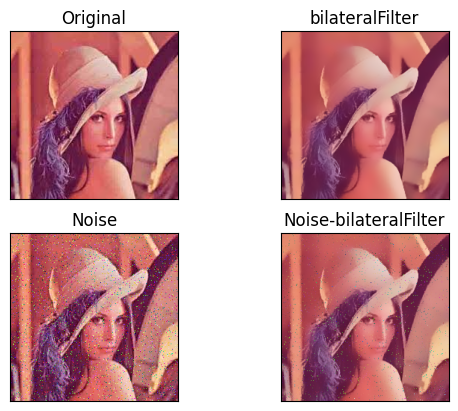

In [13]:
img = cv2.imread('lenna.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# create salt-pepper noise img
prob = 0.02 #the ratio of noise and pixels will be 2%
img_noise = np.copy(img)

salt = np.random.rand(*img.shape)<prob
img_noise[salt]= 255
pepper = np.random.rand(*img.shape)<prob
img_noise[pepper] = 0

# bilateralFilter(src, d, sigmaColor, sigmaSpace[, dst[, borderType]]) → dst
bf = cv2.bilateralFilter(img,90,90,5)
bf_noise = cv2.bilateralFilter(img_noise,90,90,5)

#
plt.subplot(221),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(bf),plt.title('bilateralFilter')
plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(img_noise),plt.title('Noise')
plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(bf_noise),plt.title('Noise-bilateralFilter')
plt.xticks([]), plt.yticks([])
plt.show()

## 4 Morphology
Morphological transformations are some simple operations based on the image shape. It is normally performed on binary images. It needs two inputs, one is our original image, second one is called `structuring element` or `kernel` which decides the nature of operation. Two basic morphological operators are Erosion and Dilation.These two operator and its variant shown as follow:
- Dilation
- Erosion
- Majority
- Opening
- Closing
- Connected Components

### 4.1 Dilation and Erosion
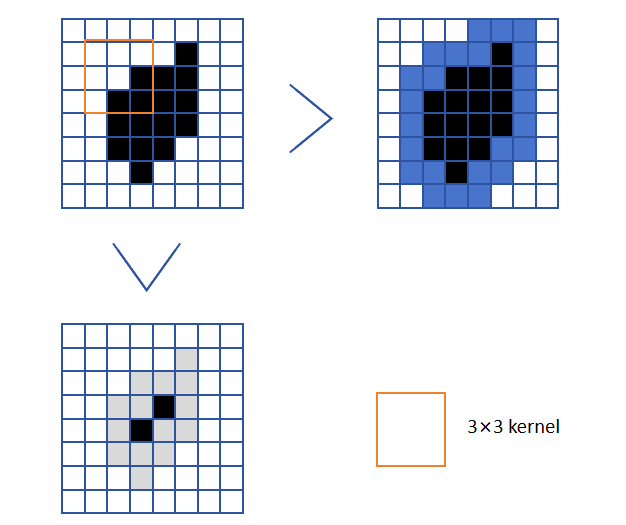

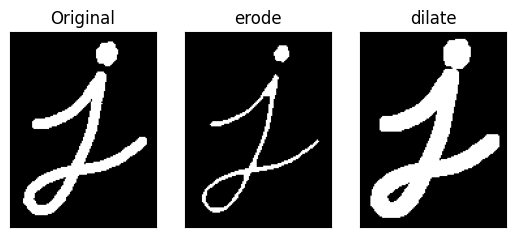

In [14]:
img = cv2.imread('j.png',0)
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)
dilation = cv2.dilate(img,kernel,iterations = 1)

plt.subplot(131),plt.imshow(img,cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(erosion,cmap='gray'),plt.title('erode')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(dilation,cmap='gray'),plt.title('dilate')
plt.xticks([]), plt.yticks([])
plt.show()

### 4.2 Majority
Majority voting is commonly used in binary image processing or multi-class classification problems. The core idea is to count the mode (the most frequently occurring value) of pixel values within a slide window and replace the center pixel's value with this mode.For example,the domain in window is：
$$
\begin{pmatrix}
1&1&0\\
0&0&1\\
1&1&0\\
\end{pmatrix}
$$
In this window, the count of `1` is bigger than that of `0`. Change the center value to 1. 



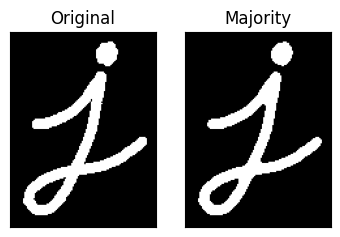

In [15]:
img = cv2.imread('j.png',0)
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)
dilation = cv2.dilate(img,kernel,iterations = 1)

height, width = img.shape[:2]
filtered_img = np.copy(img)

kernel =5
radius = kernel// 2

for y in range(radius, height - radius):
    for x in range(radius, width - radius):
        # Extract pixel values within the sliding window
        window = img[y - radius:y + radius + 1, x - radius:x + radius + 1]
            
        # Count the mode
        values, counts = np.unique(window, return_counts=True)
        majority_value = values[np.argmax(counts)]
            
        # Update the center pixel's value
        filtered_img[y, x] = majority_value

plt.subplot(131),plt.imshow(img,cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(filtered_img,cmap='gray'),plt.title('Majority')
plt.xticks([]), plt.yticks([])

plt.show()

### 4.3 Opening
Opening is just another name of erosion followed by dilation. It is useful in removing noise, as we explained above. Here we use the function, `cv2.morphologyEx()`

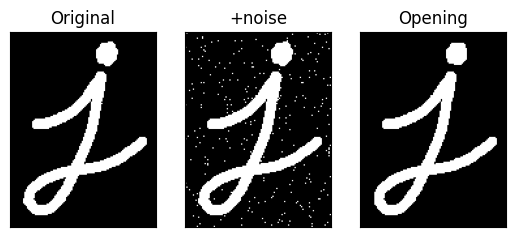

In [16]:
img = cv2.imread('j.png',0)
kernel = np.ones((5,5),np.uint8)

prob = 0.02 #the ratio of noise and pixels will be 2%
img_noise = np.copy(img)

salt = np.random.rand(*img.shape)<prob
img_noise[salt]= 255

opening = cv2.morphologyEx(img_noise, cv2.MORPH_OPEN, kernel)

plt.subplot(131),plt.imshow(img,cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_noise,cmap='gray'),plt.title('+noise')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(opening,cmap='gray'),plt.title('Opening')
plt.xticks([]), plt.yticks([])
plt.show()

### 4.4 Closing
Closing is reverse of Opening, Dilation followed by Erosion. It is useful in closing small holes inside the foreground objects, or small black points on the object.

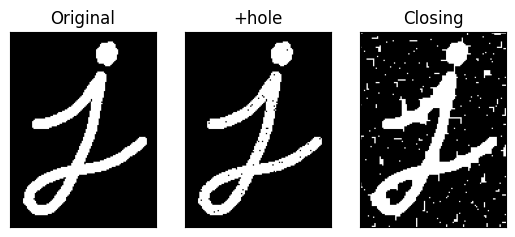

In [17]:
img = cv2.imread('j.png',0)
kernel = np.ones((5,5),np.uint8)

prob = 0.02 #the ratio of noise and pixels will be 2%
img_hole = np.copy(img)

pepper = np.random.rand(*img.shape)<prob
img_hole[pepper]= 0

closing = cv2.morphologyEx(img_noise, cv2.MORPH_CLOSE, kernel)

plt.subplot(131),plt.imshow(img,cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_hole,cmap='gray'),plt.title('+hole')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(closing,cmap='gray'),plt.title('Closing')
plt.xticks([]), plt.yticks([])
plt.show()

### 4.5 Connected Components
Computes the connected components labeled image of boolean image image with 4 or 8 way connectivity - returns N, the total number of labels (0,N-1) where 0 represents the background label.

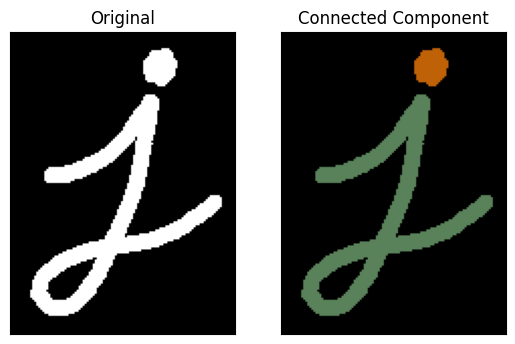

In [19]:
img = cv2.imread('j.png',0)
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(img, connectivity=8)

img_out = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)

for i in range(1, num_labels):
    img_out[labels == i] = np.random.randint(0, 255, size=3)

plt.subplot(121),plt.imshow(img,cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_out),plt.title('Connected Component')
plt.xticks([]), plt.yticks([])
plt.show()